<a href="https://colab.research.google.com/github/Z3Nkkk/Numerical_methods_of_programming/blob/main/PKR_Taran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Таран Євгеній ФІТ 1-9

Варіант за списком 25

1. Відокремити корені рівняння. Розв’язати рівняння із заданою точністю 0.001

Варіант 1. методом половинного ділення і методом хорд.

In [ ]:
import math
import numpy as np
from scipy.misc import derivative

eps=0.001

def f(x):
   return 2 * pow(x, 4) - 8 * pow(x,3) - 16 * pow(x, 2) - 1

def find_segments():

    search_range = np.arange(-10, 10, 1)
    a = None
    previous_x = None
    current_x = None
    segments = []

    for x in search_range:
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
          segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()

def half_div(a, b, eps):
    while (abs(a-b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print ('x = ', round(x, 5), ' - Метод половинного ділення')

def hord(a, b, eps):
    if (f(a) * derivative(f, a, n = 2) > 0):
        x0 = a
        x1 = b
    else:
        x0 = b
        x1 = a
    y = x1 - (x1 - x0) * f(x1) / (f(x1) - f(x0))
    while (abs(y - x1) > eps):
        x1 = y
        y = x1 - (x1 - x0) * f(x1) / (f(x1) - f(x0))
    print('x = ', round (y, 5) , ' - Метод хорд')


for a, b in segments:
    print(f'Знайдено відрізок:  [{a}, {b}]\n')
    print (f'Розв’язок рівняння на відрізку [{a}, {b}]: ')
    half_div (a, b, eps)
    hord (a, b, eps)
    print('-------------------------------------------')

Знайдено відрізок:  [-2, -1]

Розв’язок рівняння на відрізку [-2, -1]: 
x =  -1.49658  - Метод половинного ділення
x =  -1.49568  - Метод хорд
-------------------------------------------
Знайдено відрізок:  [5, 6]

Розв’язок рівняння на відрізку [5, 6]: 
x =  5.46631  - Метод половинного ділення
x =  5.46644  - Метод хорд
-------------------------------------------


<ipython-input-9-14a0e786dce5>:39: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  if (f(a) * derivative(f, a, n = 2) > 0):


2. Побудувати інтерполяційний багаточлен Лагранжа   для функції  , що задана таблицею, та з точністю до 0.001 обчислити наближені значення функції у заданих точках. Побудувати графік інтерполяційної функції   за наявним набором точок. Зробити перевірку за допомогою scipy lagrange()

Значення функції у точці -1.5 = 0.875
Значення функції у точці -0.5 = 3.125
Значення функції у точці 1 = -1.0
Значення функції у точці 2 = 0.0
-------------------------------------------


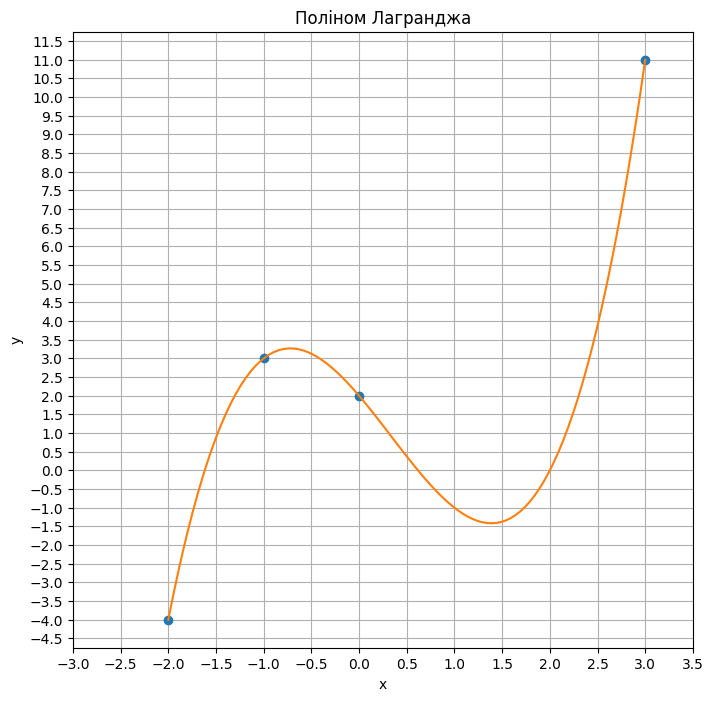

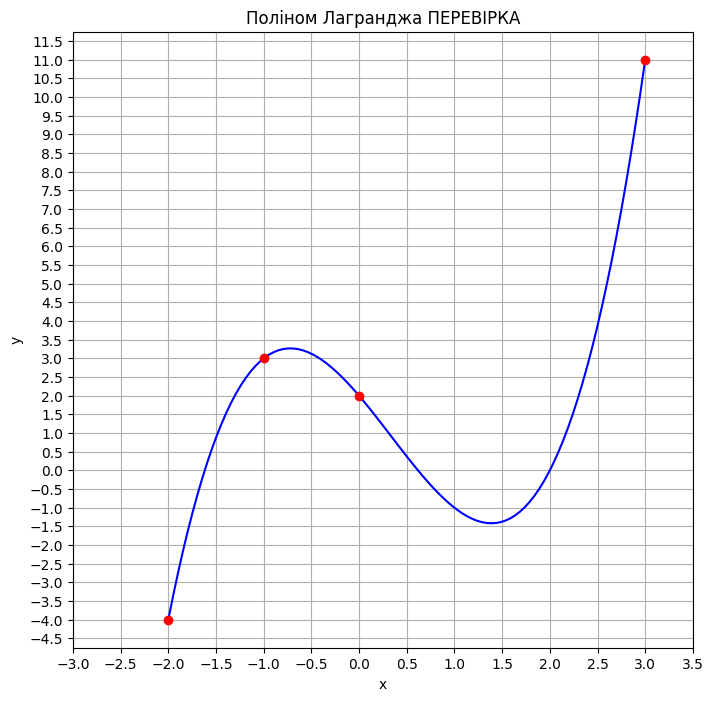

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x=np.array([-2., -1., 0., 3.], dtype=float)
y=np.array([-4., 3., 2., 11.], dtype=float)
x_test = [-1.5, -0.5, 1, 2]

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n)

    for i in range(n):
        p_i = 1

        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])

        p[i] = p_i
    return np.dot(y, p)

for i in x_test:
  f_interp = lagrange_interpolation(x, y, i)
  print(f'Значення функції у точці {i} = {f_interp.round(4)}')

print('-------------------------------------------')

xnew=np.linspace(np.min(x),np.max(x),100)
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.figure(figsize=(8, 8))
plt.plot(x,y,'o',xnew,ynew)
plt.title('Поліном Лагранджа')
plt.grid()
plt.yticks(np.arange(-4.5, 12, 0.5))
plt.xticks(np.arange(-3, 4, 0.5))
plt.xlabel('x')
plt.ylabel('y')

plt.show()


f = lagrange(x, y)
fig = plt.figure(figsize = (8,8))

plt.plot(xnew, f(xnew), 'b', x, y, 'ro')
plt.title('Поліном Лагранджа ПЕРЕВІРКА')
plt.grid()
plt.yticks(np.arange(-4.5, 12, 0.5))
plt.xticks(np.arange(-3, 4, 0.5))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

3.	Побудувати апроксимуючу функцію у вигляді кубічного сплайну для таблично заданої функції та перевірити її роботу. Побудувати графік сплайну.

Відрізок 1:
S_0(x) = 2.65 + 1.0177(x - 0.1) + 0.0(x - 0.1)^2 + -12.9435(x - 0.1)^3, x належить [0.1, 0.3]
Відрізок 2:
S_1(x) = 2.75 + -0.5355(x - 0.3) + -7.7661(x - 0.3)^2 + 11.096(x - 0.3)^3, x належить [0.3, 0.6]
Відрізок 3:
S_2(x) = 2.19 + -2.1992(x - 0.6) + 2.2203(x - 0.6)^2 + 0.9162(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 4:
S_3(x) = 1.76 + 0.7082(x - 1.1) + 3.5946(x - 1.1)^2 + -1.7117(x - 1.1)^3, x належить [1.1, 1.8]
-------------------------------------------------------------------------------------------------


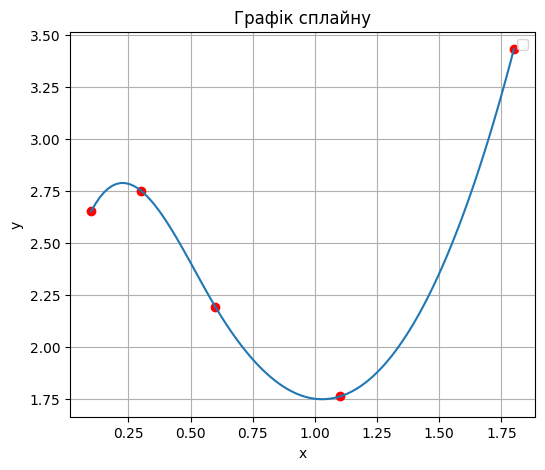

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)

m = np.zeros(n)
beta = np.zeros(n)
alpha = np.zeros(n)

k = np.zeros(n)
for i in range(0, n):
  if (i == 0):
    alpha[i] = 0
    beta[i] = 0

  elif (i == 1):
    k[i] = 3*((a[i+1] - a[i])/h[i] - (a[i] - a[i-1])/h[i-1])
    m[i] = 2 * (h[i - 1] + h[i])
    alpha[i] = k[i] / m[i]
    beta[i] = h[i] / m[i]

  else:
    k[i] = 3*((a[i+1] - a[i])/h[i] - (a[i] - a[i-1])/h[i-1])
    m[i] = 2 * (h[i - 1] + h[i])
    beta[i] = (h[i]) / (m[i] - h[i-1] * beta[i-1])
    alpha[i] = (k[i] - h[i-1] * alpha[i-1]) / (m[i] - h[i-1] * beta[i-1])

c[n-1] = alpha[n-1]
for j in range(n-1, -1, -1):
  if (j == n-1):
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (0 + 2 * c[j]) / 3
    d[j] = (0 - c[j]) / (3 * h[j])
  else:
    c[j] = alpha[j] - beta[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

print('-------------------------------------------------------------------------------------------------')

cs = CubicSpline(x, y)
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

plt.figure(figsize=(6, 5))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік сплайну')
plt.legend()
plt.grid(True)
plt.show()

4. Нехай задана функція y=f(x). Побудувати на  проміжку x∈[0.1;1]   з кроком h=0.1  наближення прямою та параболою методом найменших квадратів для заданої функції. Побудувати графік функції та графіки наближень. Використовувати метод  least_squares ()   

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
a0 = 1.08, a1 = 1.32, a2 = -0.85
-----------------------------------------------------------------------


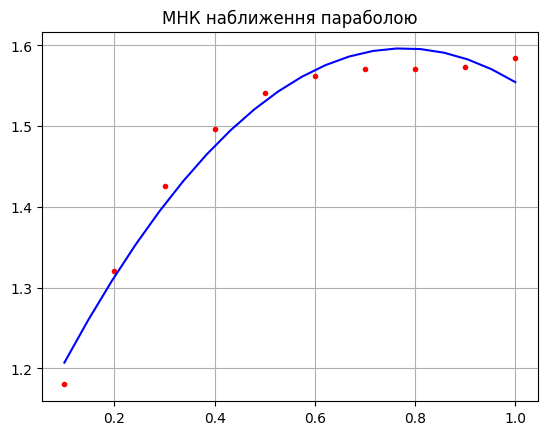

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def f1(x):
  return np.cos(2 * x) + (2 * x)

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([f1(xi) for xi in x])
print('x=', x)
print('y=', y)

def fun(a, x, y):
  return a[0] + a[1] * x + a[2] * x**2 - y

a0 = np.array([1, 1, 1])
res_lsq = least_squares(fun, x0 = a0, args = (x, y))
print("a0 = %.2f, a1 = %.2f, a2 = %.2f" % tuple(res_lsq.x))
print('-----------------------------------------------------------------------')

f = lambda x: sum([u * v for u, v in zip(res_lsq.x, [1, x, x**2])])
x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x, y, 'r.')
plt.plot(x_p, y_p, 'b')
plt.title("МНК наближення параболою")
plt.grid(True)
plt.show()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
a0 = 1.27, a1 = 0.39
-----------------------------------------------------------------------


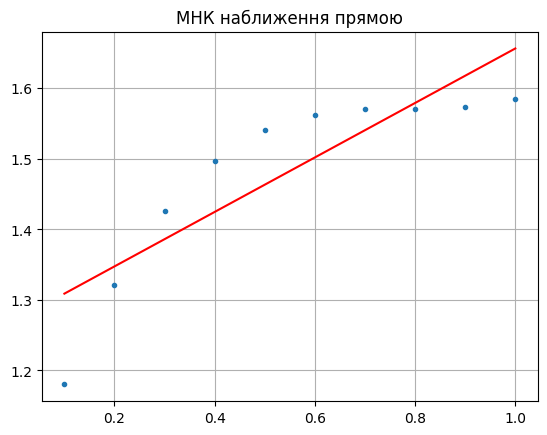

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def f1(x):
  return np.cos(2 * x) + (2 * x)

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([f1(xi) for xi in x])
print('x=', x)
print('y=', y)

def fun(a, x, y):
  return a[0] + a[1] * x - y

a0 = np.array([1, 1])
res_lsq = least_squares(fun, x0 = a0, args=(x, y))
print("a0 = %.2f, a1 = %.2f" % tuple(res_lsq.x))
print('-----------------------------------------------------------------------')

f = lambda x: res_lsq.x[0] + res_lsq.x[1] * x
x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x, y, '.')
plt.plot(x_p, y_p, 'r')
plt.title("МНК наближення прямою")
plt.grid(True)
plt.show()

5.	З точністю до 0.0001 обчислити значення визначених інтегралів:

1) методом прямокутників за умови п=10;

2) методом Сімпсона за умови п=8;

3) методом трапецій за умови п=20;  


In [ ]:
from scipy import integrate
import numpy as np

eps = 0.0001
a = 0.8
b = 1.4
n = 10

def f1(x):
  return np.power(np.sqrt(2*x + 3), -1)

def left_rec(f1, a, b, n):
  h = (b - a) / n
  sum = 0
  for i in range(0, n):
    sum += f1(a + i*h)
  return sum * h

def right_rec(f1, a, b, n):
  h = (b - a) / n
  sum = 0
  for i in range(1, n + 1):
    sum += f1(a + i*h)
  return sum * h

def aver_rec(f1, a, b, n):
  h = (b - a) / n
  x = a + h/2
  sum = f1(x)
  for i in range(0, n - 1):
    sum += f1(x + h)
    x += h
  return sum * h

def spec(def_letter, def_1, def_2, eps, n):
  while abs(def_2 - def_1) / 2 > eps:
    def_1 = def_2
    n *= 2
    if(def_letter == "l"):
      def_2 = left_rec(f1, a, b, n)
    elif(def_letter == "r"):
      def_2 = right_rec(f1, a, b, n)
    else:
      def_2 = aver_rec(f1, a, b, n)
  return def_2

print("за формулою лівих прямокутників:",round (spec("l", left_rec(f1, a, b, n), left_rec(f1, a, b, n*2), eps, n), 5))
print("за формулою правих прямокутників:",round (spec("r", right_rec(f1, a, b, n), right_rec(f1, a, b, n*2), eps, n), 5))
print("за формулою середніх прямокутників:",round (spec("a", aver_rec(f1, a, b, n), aver_rec(f1, a, b, n*2), eps, n), 5))

v,err = integrate.quad(f1, a, b)
print("\nПеревірка методу прямокутників =",round (v, 5))
print('-------------------------------------------')

за формулою лівих прямокутників: 0.26433
за формулою правих прямокутників: 0.26279
за формулою середніх прямокутників: 0.26356

Перевірка методу прямокутників = 0.26356
-------------------------------------------


In [ ]:
from scipy import integrate
import numpy as np

def f(x):
 return np.sqrt(x) * np.cos(x**2)

eps = 0.0001
a = 0.4
b = 1.2
n = 8

def simpson_rule(f, a, b, n):
  h = (b - a) / n
  integr = f(a) + f(b)
  for i in range(1,n):
    k = a + i*h
    if i % 2 == 0:
      integr += 2 * f(k)
    else:
      integr += 4 * f(k)
  integr *= h/3
  return integr

integral1 = simpson_rule(f, a, b, n)
n *= 2
integral2 = simpson_rule(f, a, b, n*2)

while abs(integral2 - integral1) / 2 > eps:
 integral1 = integral2
 n *= 2
 integral2 = simpson_rule(f, a, b, n)

print("метод Сімпсона:", round(integral2, 5))
v,err = integrate.quad(f, a, b)
print("\nПеревірка методу Сімпсона =",round(v, 5))
print('-----------------------------------')

метод Сімпсона: 0.48411

Перевірка методу Сімпсона = 0.48411
-----------------------------------


In [ ]:
from scipy import integrate
import numpy as np

def f(x):
  return np.power(np.sqrt(3*(x**2) - 0.4), -1)

eps = 0.0001
a = 1.3
b = 2.1
n = 20

def trapezoidal_rule(f, a, b, n):
  h = (b - a) / n
  x = a
  sum = f(x)
  for i in range(1, n):
    x += h
    sum += f(x)
  integral = h * ((f(a) + f(b))/2 + sum)
  return integral

integral_1 = trapezoidal_rule(f, a, b, n)
n *= 2
integral_2 = trapezoidal_rule(f, a, b, n)

while abs(integral_2 - integral_1) / 2 > eps:
  integral_1 = integral_2
  n *= 2
  integral_2 = trapezoidal_rule(f, a, b, n)

print("метод трапецій:", round(integral_2, 5))

v,err = integrate.quad(f, a, b)
print("\nПеревірка методу трапецій =",round(v, 5))
print('-----------------------------------')

метод трапецій: 0.28435

Перевірка методу трапецій = 0.28421
-----------------------------------
